<a href="https://colab.research.google.com/github/Rosireddy-V/Autocorrect_nlp/blob/main/Autocorrect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [37]:
text = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK purple purple' # 🌈
print(text)
print('string length : ',len(text))

red pink pink blue blue yellow ORANGE BLUE BLUE PINK purple purple
string length :  66


In [38]:
text_lowercase = text.lower()
print(text_lowercase)
print('string length : ',len(text_lowercase))

red pink pink blue blue yellow orange blue blue pink purple purple
string length :  66


In [39]:
words=re.findall(r'\w+',text_lowercase)
print(words)
print("no of words:- ",len(words))

['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink', 'purple', 'purple']
no of words:-  12


In [40]:
vocab=set(words)
print("no of distinct words = ",len(vocab))
print(vocab)

no of distinct words =  6
{'blue', 'purple', 'pink', 'red', 'yellow', 'orange'}


In [41]:
counts_a=dict()
for w in words:
    if w in counts_a.keys():
        counts_a[w]+=1
    else:
        counts_a[w]=1
counts_a

{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1, 'purple': 2}

In [42]:
counts_b = dict()
counts_b = Counter(words)
keys=counts_b.keys()
print(counts_b['green'])
print(counts_b)
print('count : ',len(counts_b))

0
Counter({'blue': 4, 'pink': 3, 'purple': 2, 'red': 1, 'yellow': 1, 'orange': 1})
count :  6


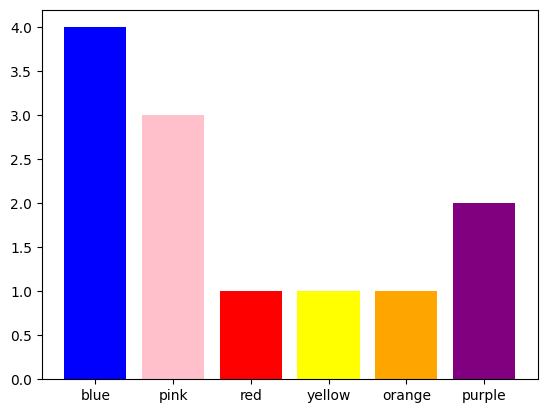

In [43]:
d = {'blue': counts_b['blue'], 'pink': counts_b['pink'], 'red': counts_b['red'], 'yellow': counts_b['yellow'], 'orange': counts_b['orange'], 'purple': counts_b['purple']}
plt.bar(range(len(d)), list(d.values()), align='center', color=d.keys())
_ = plt.xticks(range(len(d)), list(d.keys()))

In [44]:
word='dearz'

In [45]:
splits=[]
leng=len(word)+1
for i in range(leng):
    splits.append([word[0:i],word[i:]])
splits

[['', 'dearz'],
 ['d', 'earz'],
 ['de', 'arz'],
 ['dea', 'rz'],
 ['dear', 'z'],
 ['dearz', '']]

In [46]:
splits=[(word[:i],word[i:]) for i in range(leng)]
splits

[('', 'dearz'),
 ('d', 'earz'),
 ('de', 'arz'),
 ('dea', 'rz'),
 ('dear', 'z'),
 ('dearz', '')]

In [47]:
one_char_del=[]
for tup in splits:
    if tup[1]:
        one_char_del.append([tup[0]+tup[1][1:]])
one_char_del

[['earz'], ['darz'], ['derz'], ['deaz'], ['dear']]

In [48]:
def process_data(file_name):
  words=[]
  with open(file_name) as f:
    text=f.read().lower()
  words=re.findall(r'\w+',text)

  return words

In [49]:
words_st=process_data('shakespeare.txt')
vocab=set(words_st)
l_vocab=len(vocab)
print("last ten words of the corpus are:-\n",words_st[-10:])
print("there are {} unique words".format(l_vocab))

last ten words of the corpus are:-
 ['whilst', 'you', 'abide', 'here', 'enobarbus', 'humbly', 'sir', 'i', 'thank', 'you']
there are 6116 unique words


In [50]:
def count_word(words_c):
  word_count={}
  for w in words_c:
    if w not in word_count.keys():
      word_count[w]=1
    else:
      word_count[w]+=1

  return word_count

In [51]:
word_counts=count_word(words_st)
print("there are {} key-value pairs".format(len(word_counts)))

there are 6116 key-value pairs


In [52]:
def get_prob(word_count_dict):
  word_prob={}
  s=sum(word_count_dict.values())
  for w in word_count_dict.keys():
    word_prob[w]= word_count_dict[w]/s

  return word_prob

In [53]:
word_probabilites=get_prob(word_counts)
word_probabilites['thee']

0.004476442720185026

In [54]:
def del_letter(word,verbose=False):
  split_w=[]
  del_w=[]
  for i in range(len(word)):
    split_w.append((word[:i],word[i:]))
  for k in split_w:
    del_w.append(k[0]+k[1][1:])
  if verbose:
    print(f"input word = {word} \n splits of word = {split_w} \n deleted = {del_w}")
  return del_w

In [55]:
del_letters=del_letter("carr",verbose=True)

input word = carr 
 splits of word = [('', 'carr'), ('c', 'arr'), ('ca', 'rr'), ('car', 'r')] 
 deleted = ['arr', 'crr', 'car', 'car']


In [56]:
print(f"no of outputs of word be = ",len(del_letter("be")))

no of outputs of word be =  2


In [57]:
def switch_letter(word,verbose=False):
  split_w=[]
  switch_w=[]
  for i in range(len(word)):
    split_w.append([word[:i],word[i:]])
  for k in split_w:
    if len(k[1])>=2:
      switch_w.append(k[0]+k[1][1]+k[1][0]+k[1][2:])
  if verbose:
    print(f"input word = {word} \n splits of word = {split_w} \n switches= {switch_w}")

  return switch_w

In [58]:
switches= switch_letter("eta",True)

input word = eta 
 splits of word = [['', 'eta'], ['e', 'ta'], ['et', 'a']] 
 switches= ['tea', 'eat']


In [59]:
def replace_letter(word,verbose=False):
  switch_l=[]
  inser_l=[]
  letters="abcdefghijklmnopqrstuvwxyz"
  for i in range(len(word)):
    switch_l.append([word[:i],word[i:]])
  inser_l=[l+c+r[1:] for l,r in switch_l for c in letters if c!=r[0]]

  if verbose:
    print(f"input word = {word} \n switches = {switch_l} \n insertions = {inser_l}")

  return inser_l

In [60]:
insertions=replace_letter("can",True)

input word = can 
 switches = [['', 'can'], ['c', 'an'], ['ca', 'n']] 
 insertions = ['aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz']


In [61]:
print(f"Number of outputs of replace_letter('at') is {len(replace_letter('at'))}")

Number of outputs of replace_letter('at') is 50


In [62]:
def insert_letter(word,verbose=False):
  split_l=[]
  letters="abcdefghijklmnopqrstuvwxyz"
  for i in range(len(word)+1):
    split_l.append([word[:i],word[i:]])
  ins_l=[l+c+r for l,r in split_l for c in letters]

  if verbose:
    print(f"input word={word} \n splits = {split_l} \n insertions= {ins_l}")

  return ins_l

In [63]:
insertions= insert_letter("at",True)
print(f"Number of strings output by insert_letter('at') is {len(insertions)}")

input word=at 
 splits = [['', 'at'], ['a', 't'], ['at', '']] 
 insertions= ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


In [64]:
def edit_one_letter(word,allow_switches=True):
  edit_one=set()
  #edit_one=set(insert_letter(word)+del_letter(word)+replace_letter(word))
  edit_one.update(insert_letter(word))
  if allow_switches:
    edit_one.update(switch_letter(word))
  edit_one.update(del_letter(word))
  edit_one.update(replace_letter(word))
  return set(edit_one)

In [65]:
one_edit=edit_one_letter("at")
one_edit
print("length of one edit of at is = ",len(one_edit))

length of one edit of at is =  129


In [66]:
def edit_two_letter(word,allow_switches=True):
  edit_two_set=set()
  edit_one_set=edit_one_letter(word)
  for word in edit_one_set:
    edit_two_set.update(edit_one_letter(word))
  return set(edit_two_set)

In [67]:
two_edit=edit_two_letter("a")
print("length of two edit distances set is = ",len(two_edit))

length of two edit distances set is =  2654


In [68]:
def get_corrections(word,probabs,vocab,n=2,verbose=False):
  suggestions=[]
  n_best=[]
  temp=[]
  if word in probabs.keys():
    temp+=[word,word_probabilites[word]]
  temp+=sorted([[w,word_probabilites[w]] for w in edit_one_letter(word) if w in vocab],key = lambda x : -x[1])
  temp+=sorted([(w,word_probabilites[w]) for w in edit_two_letter(word) if w in vocab],key = lambda x: -x[1])

  suggestions= set(sug[0] for sug in temp[:n])
  n_best=[sug for sug in temp[:n]]
  if verbose:
    print("entered word = ", word, "\nsuggestions = ", suggestions)
  return n_best

In [69]:
my_word = 'dys'
tmp_corrections = get_corrections(my_word, word_probabilites, vocab, 2, verbose=True)
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

entered word =  dys 
suggestions =  {'dye', 'days'}
word 0: days, probability 0.000410
word 1: dye, probability 0.000019


In [80]:
def min_edit_dist(source,target,ins_cost=1,del_cost=1,rep_cost=2):
  m=len(source)
  n=len(target)
  D=np.zeros((m+1,n+1),dtype=int)
  for i in range(0,m+1):
    D[i,0]=i*del_cost
  for i in range(0,n+1):
    D[0,i]=i*ins_cost
  for i in range(1,m+1):
    for j in range(1,n+1):
      r_cost=rep_cost
      if source[i-1]==target[j-1]:
        r_cost=0
      D[i,j]=min(D[i-1,j-1]+r_cost,D[i-1,j]+del_cost,D[i,j-1]+ins_cost)

  med=D[m,n]

  return D,med


In [81]:
source =  'play'
target = 'stay'
matrix, min_edits = min_edit_dist(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  4 

   #  s  t  a  y
#  0  1  2  3  4
p  1  2  3  4  5
l  2  3  4  5  6
a  3  4  5  4  5
y  4  5  6  5  4


In [83]:
source =  'eer'
target = 'near'
matrix, min_edits = min_edit_dist(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list(source)
idx.insert(0, '#')
cols = list(target)
cols.insert(0, '#')
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  3 

   #  n  e  a  r
#  0  1  2  3  4
e  1  2  1  2  3
e  2  3  2  3  4
r  3  4  3  4  3


In [84]:
source = "eer"
targets = edit_one_letter(source,allow_switches = False)
for t in targets:
    _, min_edits = min_edit_dist(source, t,1,1,1)
    if min_edits != 1: print(source, t, min_edits)

In [85]:
source = "eer"
targets = edit_two_letter(source,allow_switches = False)
for t in targets:
    _, min_edits = min_edit_dist(source, t,1,1,1)
    if min_edits!=2 and min_edits != 1: print(source, t, min_edits)

eer erze 3
eer erme 3
eer wre 3
eer eroe 3
eer erne 3
eer jre 3
eer erve 3
eer erbe 3
eer qre 3
eer erie 3
eer ure 3
eer kre 3
eer erte 3
eer bre 3
eer dre 3
eer hre 3
eer mre 3
eer erce 3
eer erfe 3
eer gre 3
eer yre 3
eer erhe 3
eer erxe 3
eer xre 3
eer nre 3
eer erqe 3
eer erpe 3
eer erge 3
eer fre 3
eer erse 3
eer zre 3
eer are 3
eer erde 3
eer ore 3
eer erye 3
eer erae 3
eer pre 3
eer ire 3
eer erle 3
eer erje 3
eer erke 3
eer cre 3
eer vre 3
eer tre 3
eer eer 0
eer rre 3
eer erue 3
eer lre 3
eer erwe 3
eer sre 3
